In [1]:
%load_ext autoreload
%autoreload 2

In [6]:
import numpy as np
import scipy
import matplotlib as mpl
import matplotlib.pyplot as plt

import scipy.optimize as optm

import os
import sys
import time
from pathlib import Path
fun_lib_path = Path.home() / 'git/alexei_fun_lib' 
sys.path.append(str(fun_lib_path))

import collections
import functools

import optics_funs as of
import numerical_funs as nf
import matplotlib_funs as mpf
import LCT_funs as lctf
import general_funs as gef

import new_types as nt
import mutants

import finesse
import finesse.ligo
from finesse.cymath.homs import HGModes

import func_funs as ff
import graph_funs as grf
import finesse3_funs as f3f
import wolfram_funs as wlf

import networkx as nx
# import pygraphviz as pgv
import pydot

from IPython.display import Image, SVG

In [7]:
code = '''
m ITMY
s LY ITMY.p2 ETMY.p1
m ETMY
'''

kat = finesse.Model()
kat.parse(code)

In [4]:
G = grf.remove_orphans(kat.optical_network)
node_mapping = {'ITMY.p1.i':1, 'ITMY.p1.o':2, 'ITMY.p2.i':4, 'ITMY.p2.o':3, 'ETMY.p1.i':5, 'ETMY.p1.o':6, 'ETMY.p2.i':8, 'ETMY.p2.o':7}


GN = grf.copy_graph(G)
GN = nx.relabel_nodes(GN, node_mapping)

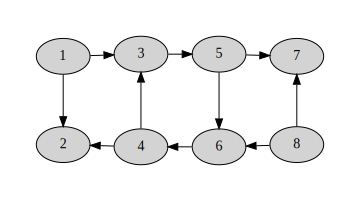

In [5]:
finesse.plotting.graphviz_draw(network=GN, scale=1, angle=-90)

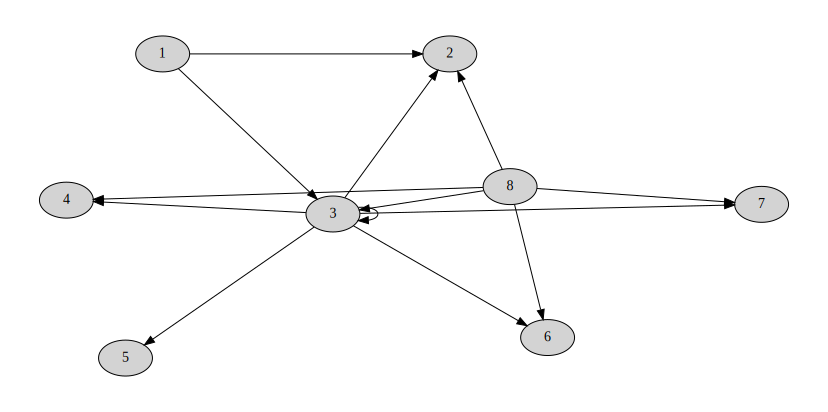

In [6]:
nodes = [n for n in GN.nodes if not n in [3]]

RG = grf.annotate_paths_to_graph(GN)
for n in nodes:
    grf.absorb_node(RG,n,inplace=True, keep_node=True)

finesse.plotting.graphviz_draw(network=RG, scale=2)

In [7]:
list(RG.successors(3))

[5, 6, 7, 4, 3, 2]